# Assignment 3


### Relativity visualization and radiation

On this homework assignment, you will be responsible for importing all of the python packages you need for your calculations. You will also be responsible for making your plot axis labels large enough for me to read them easily. Please make sure to put units on your axes where appropriate.

Instead of defining your own constants, use the pre-programmed values from <tt>scipy.constants</tt>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

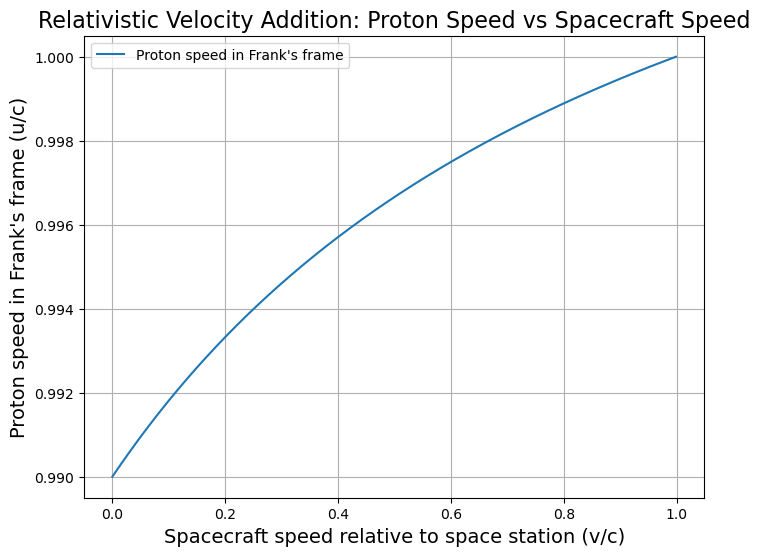

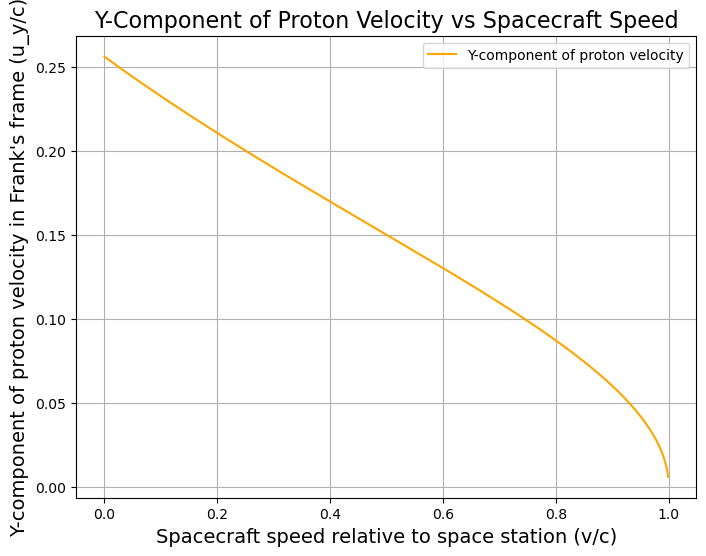

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Part 1A: Proton speed in Frank's frame as a function of spacecraft speed
c = constants.c  # Speed of light in m/s
u_prime = 0.99 * c  # Proton speed in Mary's frame

# Define a range of spacecraft speeds (v) from 0 to 0.999c
v = np.linspace(0, 0.999 * c, 1000)

# Relativistic velocity addition
u = (u_prime + v) / (1 + (u_prime * v) / (c**2))

# Plot the result for Part 1A
plt.figure(figsize=(8, 6))
plt.plot(v / c, u / c, label='Proton speed in Frank\'s frame')
plt.xlabel('Spacecraft speed relative to space station (v/c)', fontsize=14)
plt.ylabel('Proton speed in Frank\'s frame (u/c)', fontsize=14)
plt.title('Relativistic Velocity Addition: Proton Speed vs Spacecraft Speed', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Part 1B: Y-component of proton velocity in Frank's frame
theta = np.radians(15)  # Convert 15 degrees to radians
u_prime_x = u_prime * np.cos(theta)  # x-component in Mary's frame
u_prime_y = u_prime * np.sin(theta)  # y-component in Mary's frame

# Compute gamma for each v
gamma = 1 / np.sqrt(1 - (v**2 / c**2))

# Compute the denominator for the transformations
denom = 1 + (v * u_prime_x) / (c**2)

# Compute the y-component in Frank's frame
u_y = u_prime_y / (gamma * denom)

# Plot the result for Part 1B
plt.figure(figsize=(8, 6))
plt.plot(v / c, u_y / c, label='Y-component of proton velocity', color='orange')
plt.xlabel('Spacecraft speed relative to space station (v/c)', fontsize=14)
plt.ylabel('Y-component of proton velocity in Frank\'s frame (u_y/c)', fontsize=14)
plt.title('Y-Component of Proton Velocity vs Spacecraft Speed', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants


c = constants.c / 1000  # Convert m/s to km/s, c = 3e5 km/s

# Part 2A: Plot the flashes and their light world lines
# Flash positions
flash1_x, flash1_t = 0, 0
flash2_x, flash2_t = 30000, 0

# Convert to plot coordinates
flash1_ct = flash1_t * c
flash2_ct = flash2_t * c

# Plot the flashes as points
plt.figure(figsize=(10, 8))
plt.scatter([flash1_x, flash2_x], [flash1_ct, flash2_ct], color='red', label='Flashes', s=100)

# Light world lines
x = np.linspace(-10000, 60000, 100)  # Range of x for plotting light rays
# Flash 1 (x = 0)
plt.plot(x, x, 'b--', label='Light rays')  # ct = x
plt.plot(x, -x, 'b--')  # ct = -x
# Flash 2 (x = 30000)
plt.plot(x, x - 30000, 'b--')  # ct = x - 30000
plt.plot(x, -(x - 30000), 'b--')  # ct = -(x - 30000)

# Part 2B: Plot the JWST
jwst_x = 15000
plt.axvline(x=jwst_x, color='green', linestyle='-', label='JWST world line')
plt.scatter([jwst_x], [0], color='green', marker='s', s=100)

# Part 2C: Plot the microprobe
probe_x0 = 500000
probe_v = -0.1 * c  # Velocity in km/s

# Microprobe world line: x = x0 + vt, or ct = (x0 - x) / 0.1
x_probe = np.linspace(0, 500000, 100)
ct_probe = (probe_x0 - x_probe) / 0.1
plt.plot(x_probe, ct_probe, 'purple', label='Microprobe world line')
plt.scatter([probe_x0], [0], color='purple', marker='^', s=100)

# Set axis labels and title
plt.xlabel('x (km)', fontsize=14)
plt.ylabel('ct (km)', fontsize=14)
plt.title('Spacetime Diagram: Flashes, JWST, and Microprobe', fontsize=16)
plt.grid(True)
plt.legend()
plt.xlim(-10000, 550000)
plt.ylim(-50000, 5000000)
plt.show()

<ol start=3>
    <li>Use Wien's displacement law, $\lambda_{\rm max} = \frac{2.898 \times 10^{-3} \mathrm{m} \cdot \mathrm{K}}{T}$, to find and plot the wavelength of maximum intensity for seven different types of stars: O5, B5, A5, F5, G5, K5, M5. Label both axes and each data point on your plot. You may find <a href="https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html">this table</a> of star types and temperatures helpful. Warning: <em>watch your units</em>.</li>
</ol>

In [ ]:
import matplotlib.pyplot as plt

star_types = ['O5', 'B5', 'A5', 'F5', 'G5', 'K5', 'M5']
temperatures = [54000, 15200, 8310, 6700, 5660, 4400, 3200]  # in K
lambda_max = [53.67, 190.79, 348.74, 432.54, 512.01, 658.64, 905.63]  # in nm

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(temperatures, lambda_max, color='blue', s=100)

# Annotate each point with the star type
for i, star in enumerate(star_types):
    plt.annotate(star, (temperatures[i], lambda_max[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Label the axes
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('Wavelength of Maximum Intensity (nm)', fontsize=14)
plt.title('Wavelength of Maximum Intensity vs. Temperature for Different Star Types', fontsize=16)

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In class we will describe the photoelectric effect qualitatively in terms of photons knocking electrons loose from their atoms. Here we will delve into the photoelectric effect quantitatively. Read about the photoelectric effect in your textbook, then read <em>Photoelectric effect step by step</em> in the Quantization module of Canvas. (Note: <em>Photoelectric effect step by step</em> is designed to go along with a lab, which we don't have.)

A note about units: recall from PHYS 208/245 that 1 Volt = 1 Joule/Coulomb. Electrons and protons give us a fundamental unit of electric charge, or elementary charge, $|q| = e = 1.602 \times 10^{−19}$ C. We can also calculate a fundamental unit of energy by calculating the change in kinetic energy of the elementary charge $e$ accelerated through an electric potential of 1 Volt. This new unit of energy is called the electron-Volt or eV. 1 eV = $1.602 \times 10^{−19}$ J.

<ol start=4>
    <li>Assume you are trying to verify the experimental results that led to Einstein's successful explanation of the photoelectric effect. You have two emitters or "photocathodes"; one is made of aluminum and the other is made of gold. On <strong>one set of axes</strong>, plot the <em>maximum</em> photoelectron kinetic energy in eV that you could measure as a function of frequency $\nu$ from <strong>both photocathodes</strong>. Make sure your plot shows the frequency cutoffs below which <em>no</em> photoelectrons will be generated. Label both axes and put a legend on your plot so a reader with no physics experience will know which curve belongs to which metal. You may find this <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/photoelec.html">table of work functions</a> helpful.</li>
</ol>

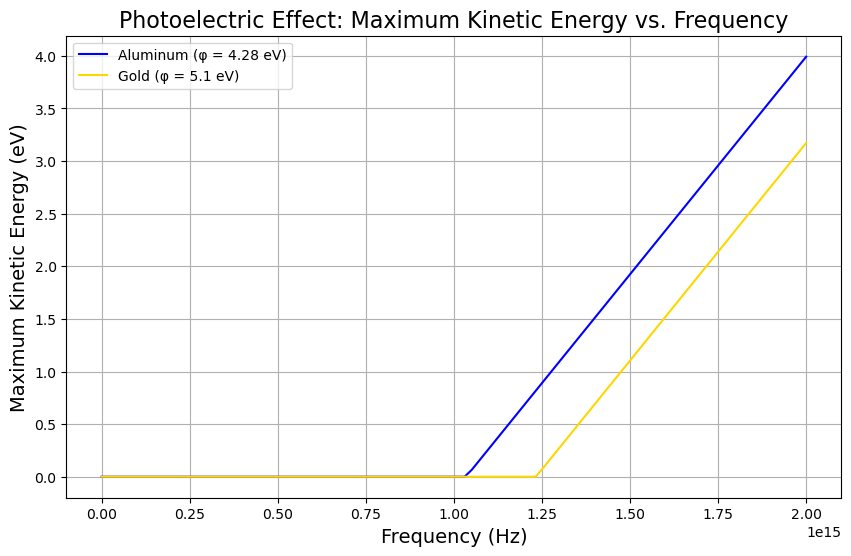

In [10]:
import numpy as np
import matplotlib.pyplot as plt



# Constants
h = 4.136e-15  # Planck's constant in eV·s

# Work functions in eV
phi_al = 4.28  # Aluminum
phi_au = 5.1   # Gold

# Threshold frequencies
nu_0_al = phi_al / h  # Aluminum
nu_0_au = phi_au / h  # Gold

# Frequency range (in Hz)
nu = np.linspace(0, 2e15, 100)

# Calculate K_max for each metal (in eV)
# For frequencies below threshold, K_max = 0
k_max_al = np.maximum(0, h * nu - phi_al)  # Aluminum
k_max_au = np.maximum(0, h * nu - phi_au)  # Gold

# Plot
plt.figure(figsize=(10, 6))
plt.plot(nu, k_max_al, label='Aluminum (φ = 4.28 eV)', color='blue')
plt.plot(nu, k_max_au, label='Gold (φ = 5.1 eV)', color='gold')

# Label axes
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('Maximum Kinetic Energy (eV)', fontsize=14)
plt.title('Photoelectric Effect: Maximum Kinetic Energy vs. Frequency', fontsize=16)

# Add grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()
